# Data science and Business analytics intern at The Sparks Foundation
# Cavin Macwan
# GRIPJAN21
# Task-4
# Exploratory Data Analysis - Terrorism
### Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’,try to find out the hot zone of terrorism

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
dataset = pd.read_csv('globalterrorism.csv', encoding='ISO-8859-1')
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
dataset = dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'})
dataset.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset= dataset[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataset.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Checking the rows and columns

In [5]:
dataset.shape

(181691, 19)

# Checking missing data

In [6]:
missing_data = dataset.isnull()
missing_data.head(5)

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True


In [7]:
#Using for loop for checking missing data column-wise
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Year
False    181691
Name: Year, dtype: int64

Month
False    181691
Name: Month, dtype: int64

Extended
False    181691
Name: Extended, dtype: int64

Day
False    181691
Name: Day, dtype: int64

Country
False    181691
Name: Country, dtype: int64

State
False    181270
True        421
Name: State, dtype: int64

Region
False    181691
Name: Region, dtype: int64

City
False    181257
True        434
Name: City, dtype: int64

Latitude
False    177135
True       4556
Name: Latitude, dtype: int64

Longitude
False    177134
True       4557
Name: Longitude, dtype: int64

AttackType
False    181691
Name: AttackType, dtype: int64

Killed
False    171378
True      10313
Name: Killed, dtype: int64

Wounded
False    165380
True      16311
Name: Wounded, dtype: int64

Target
False    181055
True        636
Name: Target, dtype: int64

Summary
False    115562
True      66129
Name: Summary, dtype: int64

Group
False    181691
Name: Group, dtype: int64

Target_type
False    181691
Name: Target_type, d

# Checking datatypes

In [8]:
dataset.dtypes

Year             int64
Month            int64
Extended         int64
Day              int64
Country         object
State           object
Region          object
City            object
Latitude       float64
Longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
dtype: object

In [9]:
import seaborn as sns

## Visualizing year

In [10]:
dataset['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

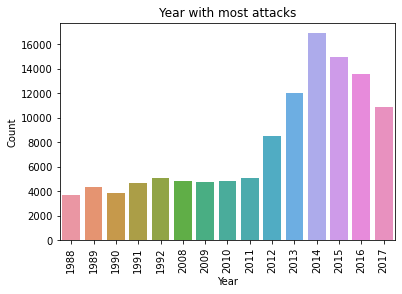

In [11]:
sns.barplot(dataset['Year'].value_counts()[:15].index,dataset['Year'].value_counts()[:15].values)
plt.title('Year with most attacks')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Visualizing Countries

In [12]:
dataset['Country'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
Falkland Islands         1
New Hebrides             1
Wallis and Futuna        1
Vatican City             1
South Vietnam            1
Name: Country, Length: 205, dtype: int64

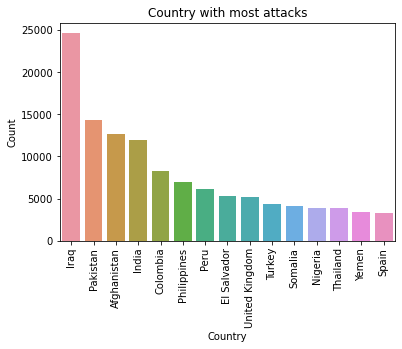

In [13]:
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values)
plt.title('Country with most attacks')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Visualizing States

In [14]:
dataset['State'].value_counts()

Baghdad                 7645
Northern Ireland        4498
Unknown                 4290
Balochistan             3710
Saladin                 3411
                        ... 
Karlovac                   1
Chelyabinsk (Oblast)       1
Burgos                     1
Atacora                    1
Kurdufan                   1
Name: State, Length: 2855, dtype: int64

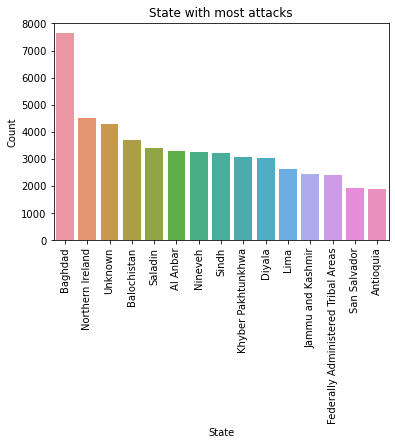

In [15]:
sns.barplot(dataset['State'].value_counts()[:15].index,dataset['State'].value_counts()[:15].values)
plt.title('State with most attacks')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Visualizing Region

In [16]:
dataset['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

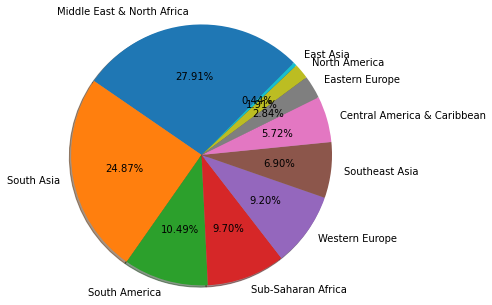

In [17]:
plt.axis("equal")
plt.pie(dataset['Region'].value_counts()[:10], labels = dataset['Region'].value_counts()[:10].index, radius = 1.5, autopct = '%0.2f%%',
       shadow = True, startangle = 45)
plt.show()

# Visualizing City

In [18]:
dataset['City'].value_counts()

Unknown              9775
Baghdad              7589
Karachi              2652
Lima                 2359
Mosul                2265
                     ... 
Shati Meena             1
Nahr Yei district       1
Paraguaipoa             1
Schipol                 1
New Agutaya             1
Name: City, Length: 36674, dtype: int64

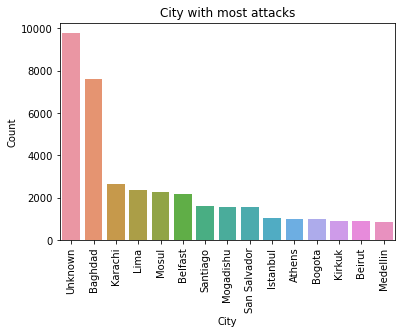

In [19]:
sns.barplot(dataset['City'].value_counts()[:15].index,dataset['City'].value_counts()[:15].values)
plt.title('City with most attacks')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Most frequent attacktype

In [20]:
dataset['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

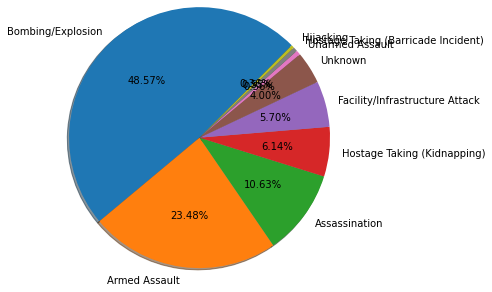

In [21]:
plt.axis("equal")
plt.pie(dataset['AttackType'].value_counts()[:10], labels = dataset['AttackType'].value_counts()[:10].index, radius = 1.5, autopct = '%0.2f%%',
       shadow = True, startangle = 45)
plt.show()

# Killed vs Wounded visualization

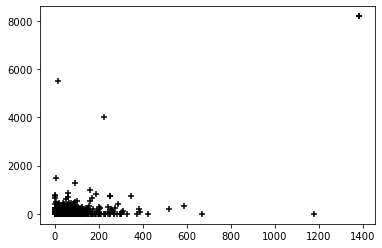

In [22]:
plt.scatter('Killed', 'Wounded', data=dataset, c = 'black', marker = '+')

# Most used weapons

In [23]:
dataset['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

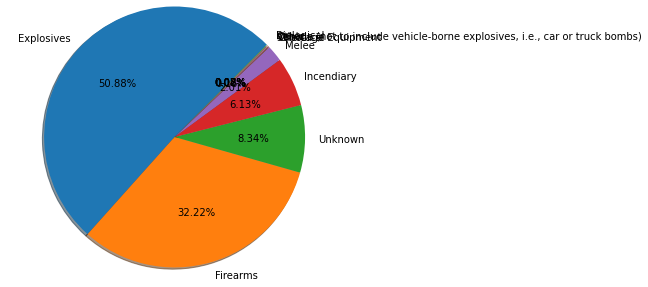

In [24]:
plt.axis("equal")
plt.pie(dataset['Weapon_type'].value_counts()[:10], labels = dataset['Weapon_type'].value_counts()[:10].index, radius = 1.5, autopct = '%0.2f%%',
       shadow = True, startangle = 45)
plt.show()

# Most active group in Terrorism

In [25]:
dataset['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Liwa al-Sham                                            1
Jihad Brigades                                          1
Pakistan Muslim League (PML)                            1
Kisar Liberation Movement                               1
Lashkari-e-Adam (Army of Adam)                          1
Name: Group, Length: 3537, dtype: int64

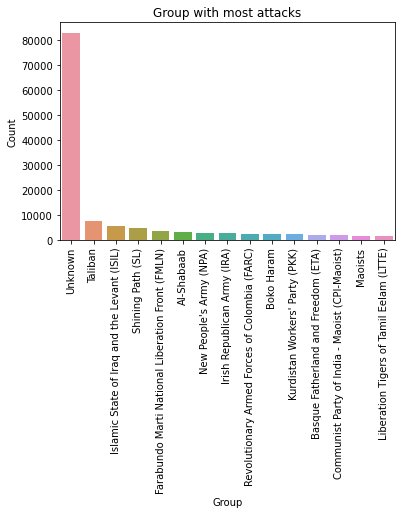

In [26]:
sns.barplot(dataset['Group'].value_counts()[:15].index,dataset['Group'].value_counts()[:15].values)
plt.title('Group with most attacks')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Terrorists most favourite target

In [27]:
dataset['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

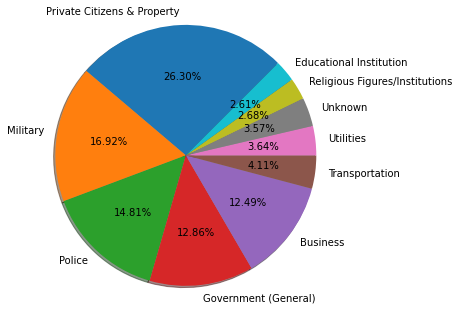

In [28]:
plt.axis("equal")
plt.pie(dataset['Target_type'].value_counts()[:10], labels = dataset['Target_type'].value_counts()[:10].index, radius = 1.5, autopct = '%0.2f%%',
       shadow = True, startangle = 45)
plt.show()

### Attackers favourite target is Citizens

# Conclusion

## 1.Year with most attacks is 2014
## 2.Country with most attacks is Iran
## 3.State and City with most attacks is Baghdad
## 4.Region with most attacks is Middle East & North Africa
## 5.Most used AttackType is Bombing/Explosion
## 6.Group with most attacks is Taliban
## 7.Attackers favourite target is Citizens